# Sentiment analysis in the context of past and future in the European parliamentary debates

## Motivation
How does the European Parliament talk about ‘the future’ and ‘the past’?

Why we have chosen this perspective? Because it is universal and creates a framework for discussing over issues even vital values and notions. We want to analyze how MEPs speak about the past and the future and what ideas they connect with such a broad and essential concepts. 
We are also going to investigate how these ideas change over time, how do they differ between political parties, fractions, ages, genders, geographical regions, etc?

## Dataset(s)

We use the open linked data from the parliamentary debates available from http://www.europarl.europa.eu/plenary/en/debates-video.html. The dataset comprices of 247,955 text documents of parliamentary speeches spanning from 1999 – 2017, in both original language of the speaker and a translation in english. Other than that, we also ahve the metadata setails which include name, country, data of birth, gender and function of the speaker, date of speech, furthermore a link to the video of the debate proceedings. It is to be noted that prior to 2013, the member need not be physically present in the debate proceedings, however he/she could submit a pre-written speech to the parliament. However, since 2013 it is the case that the member has to be physically present to engage in the debate and put his voice forward. So there is a sharp decrease in the number of debates after 2013. We also do not have translations of the textual data to English after 2013. These limitations in the data are to be considered while presenting our findings and conlusions.

## Our contribution(s)

### Creating subcorpus
We select keywords which are related to the words future/past by selecting the co-occuring words with the words under consideration. Furthermore we also tried methods including but not limited to topic modelling, word embedding and selected keywords that appear with 'past' and 'future'. We created a subcorpus from the original corpora of speeches where at least one of these keywords appear. We also performed a fine-grained analysis of text by creating a subcorpus of sentences where one of the keywords appear. The subcorpus of sentences gives a more descriptive analysis of sentiments and subjectivity scores, which are used for our sentiment analysis results.

### Challenges 
A fundamental challenge for our project was in defining the past and the future. Futhermore, how does to detect the past and future in the corpus? 

### Key results
Our key results conclude that the past and future are very related, this was clearly obseved while analysing the case study of totalitarianism. For eample, Hitler and Stalin are strongly connected in discourse, with no significant differences between East and West.
Our analysis gave us insight for thinking conceptually what is the future? and waht is the past?, eventhough we were not able to conclude it concretely.
Using topic modelling, we were able to connect the topics with the past or to the future. Using sentiment analysis, we obtained interesting results such as: speakers seem to be less emotional and more concrete while talking about future.

### Individual contribution(s)
As a part of the team, my major role was in the preprocessing of the corpus and creating subcorpus, topic modelling, sentiment analysis and interpretation of results obtained from data analysis. 

## Implementation

Our implementation is in python programming language and we use stand python packages for data analysis. For the purpose of sentiment analysis we use the $\texttt{pattern}$ package which has been extensively used for the sentiment analysisof social media data including Twitter, 4chan and yelp reviews. It is to be noted that we used $\texttt{pattern}$ package as a black box, more precisely, for the sake of this project we used this package to obtain the sentiment and subjectivity score of the text, and considered this score to be correct. However, we also performed a qualitative analysis of scores by manually scoring the text under consideration and comparing the results with the black box results. We indeed observed some discripancy in the scores when compred with the black box results.

## Sentiment analysis

### Future subcorpus
In this section we present the sentiment analysis of future subcorpus. The construction of subcorpus is explained in the creating subcorpus section. We display a timeline of the Absolute count of number of sentences which discuss about the future aspects and the average sentiment score. And we also show a timeline of varience in the sentiment score. 

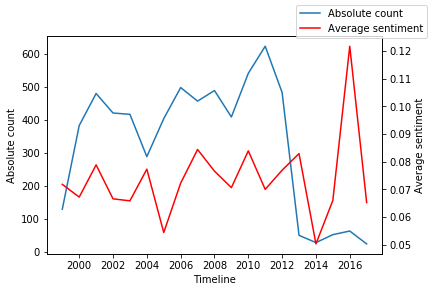

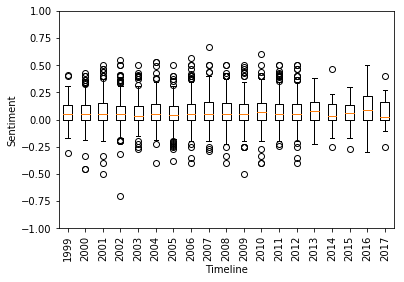

In [211]:
plot_sentiment(future_df)

### Past subcorpus

In this section we present the sentiment analysis of past subcorpus. The construction of subcorpus is explained in the creating subcorpus section. We display a timeline of the Absolute count of number of sentences which discuss about the future aspects and the average sentiment score. And we also show a timeline of varience in the sentiment score. We can clearly see that there is a high varience in the sentiment scores of past subcorpus as compared with that of the future subcorpus plot above. 

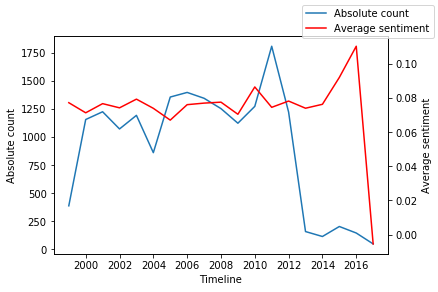

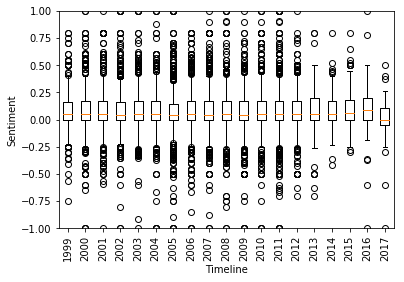

In [212]:
plot_sentiment(past_df)

### Analysis of sentiment and subjectivity for Past and Future subcorpus with sentences extracted.

In this section we analyse the subcorpus obtained by selecting the subcorpus with words associated with past and future. We perform the sentiment analysis using the $\texttt{pattern}$ python package. The below code selects five hundred texts uniformly at random and computes its sentiment and subjectivity scores and plots the results of fifteen such random instances. In all the plots it is clearly found that the subjectivity of past subcorpus tends towards greater values as compared future subcorpus.

<Figure size 1440x1440 with 0 Axes>

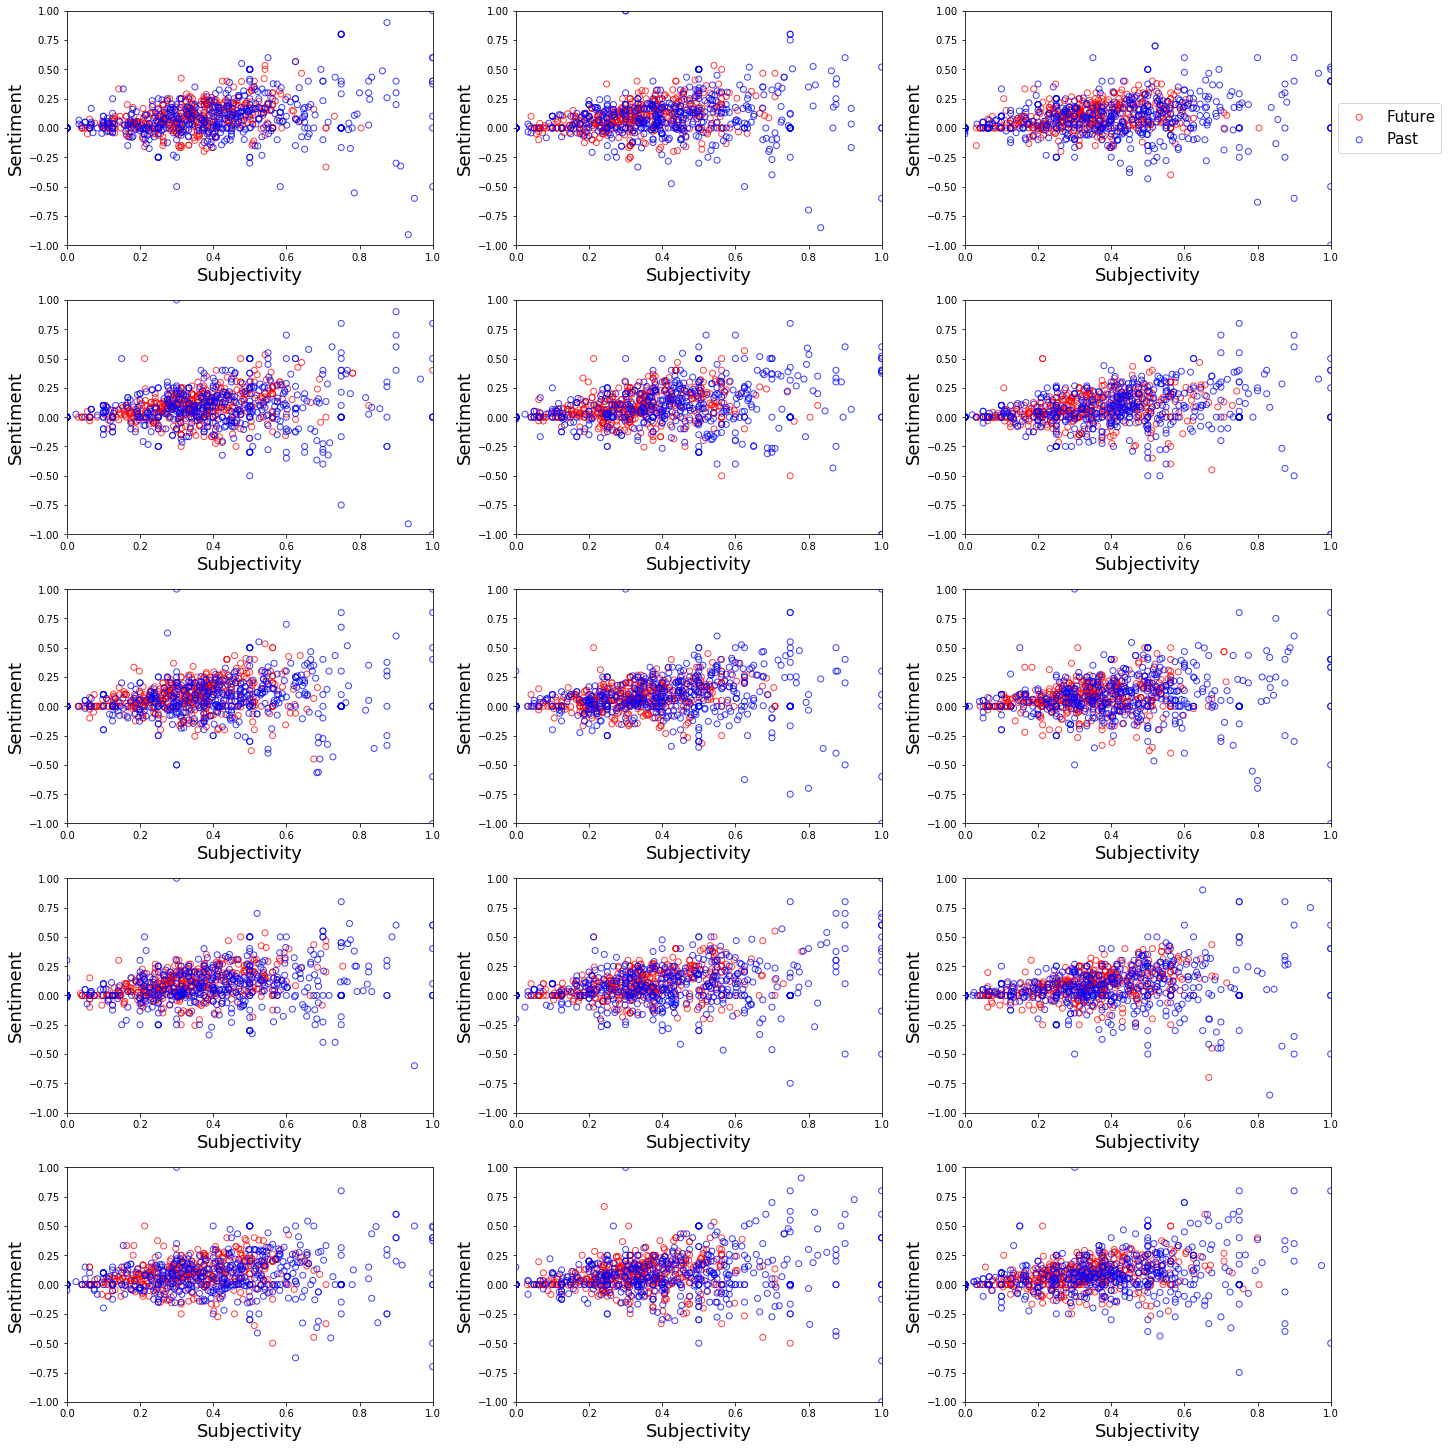

In [202]:
plot_sentences()

### Analysis of sentiment and subjectivity for the corpus with complete speeches

In this section we analyse the subcorpus of speeches obtained by selecting the speeches with words associated with past and future. We perform sentiment analysis using the $\texttt{pattern}$ python package. The below code selects five hundred speeches uniformly at random and computes its sentiment and subjectivity scores, and plots the results of fifteen such random instances. These random instances are chosen uniformly at random. In all the plots it is clearly found that the subjectivity ans sentiment scores are concentrated in the middle suggesting that the analysis of complete speeches do not reveal much about the sentiments. It also could be that analysis the complete speech do not make much sense in practice.

<Figure size 1440x1440 with 0 Axes>

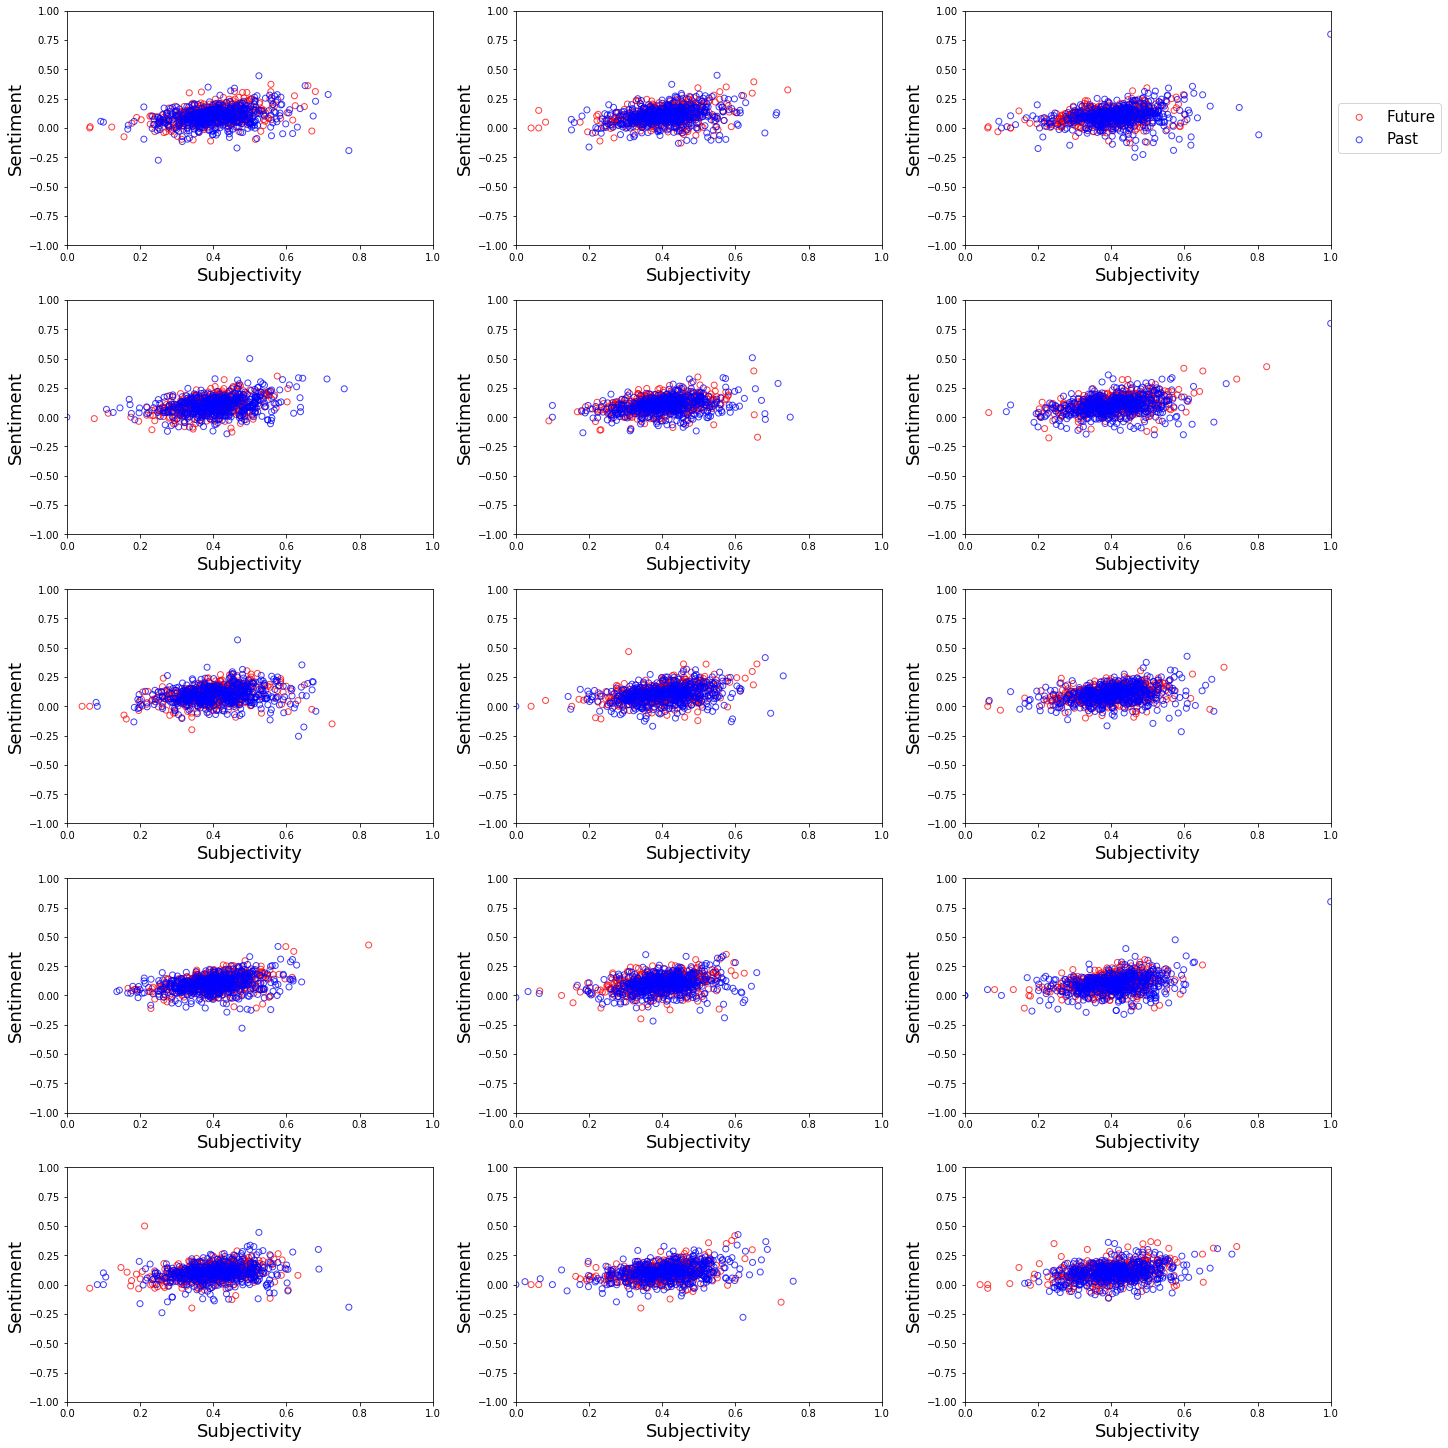

In [204]:
plot_speeches()

## Sentiment analysis of climate-change subcorpus

In this section we present the sentiment analysis of climate change subcorpus. The subcorpus is obtained using the same approach as used for obtaining the future/past subcorpus. It is to be noted that the data after year 2013 has not been translated, hence there is a steep decrease in the number of speeches and hence the sentiment scores. The below plot shows the timeline of absolute count of number of sentences in which the climate change topic was discussed by each country and the corresponding sentiment score. The represented sentiment score is the average of the sentiment scores of sentences in each year.

<Figure size 1440x1440 with 0 Axes>

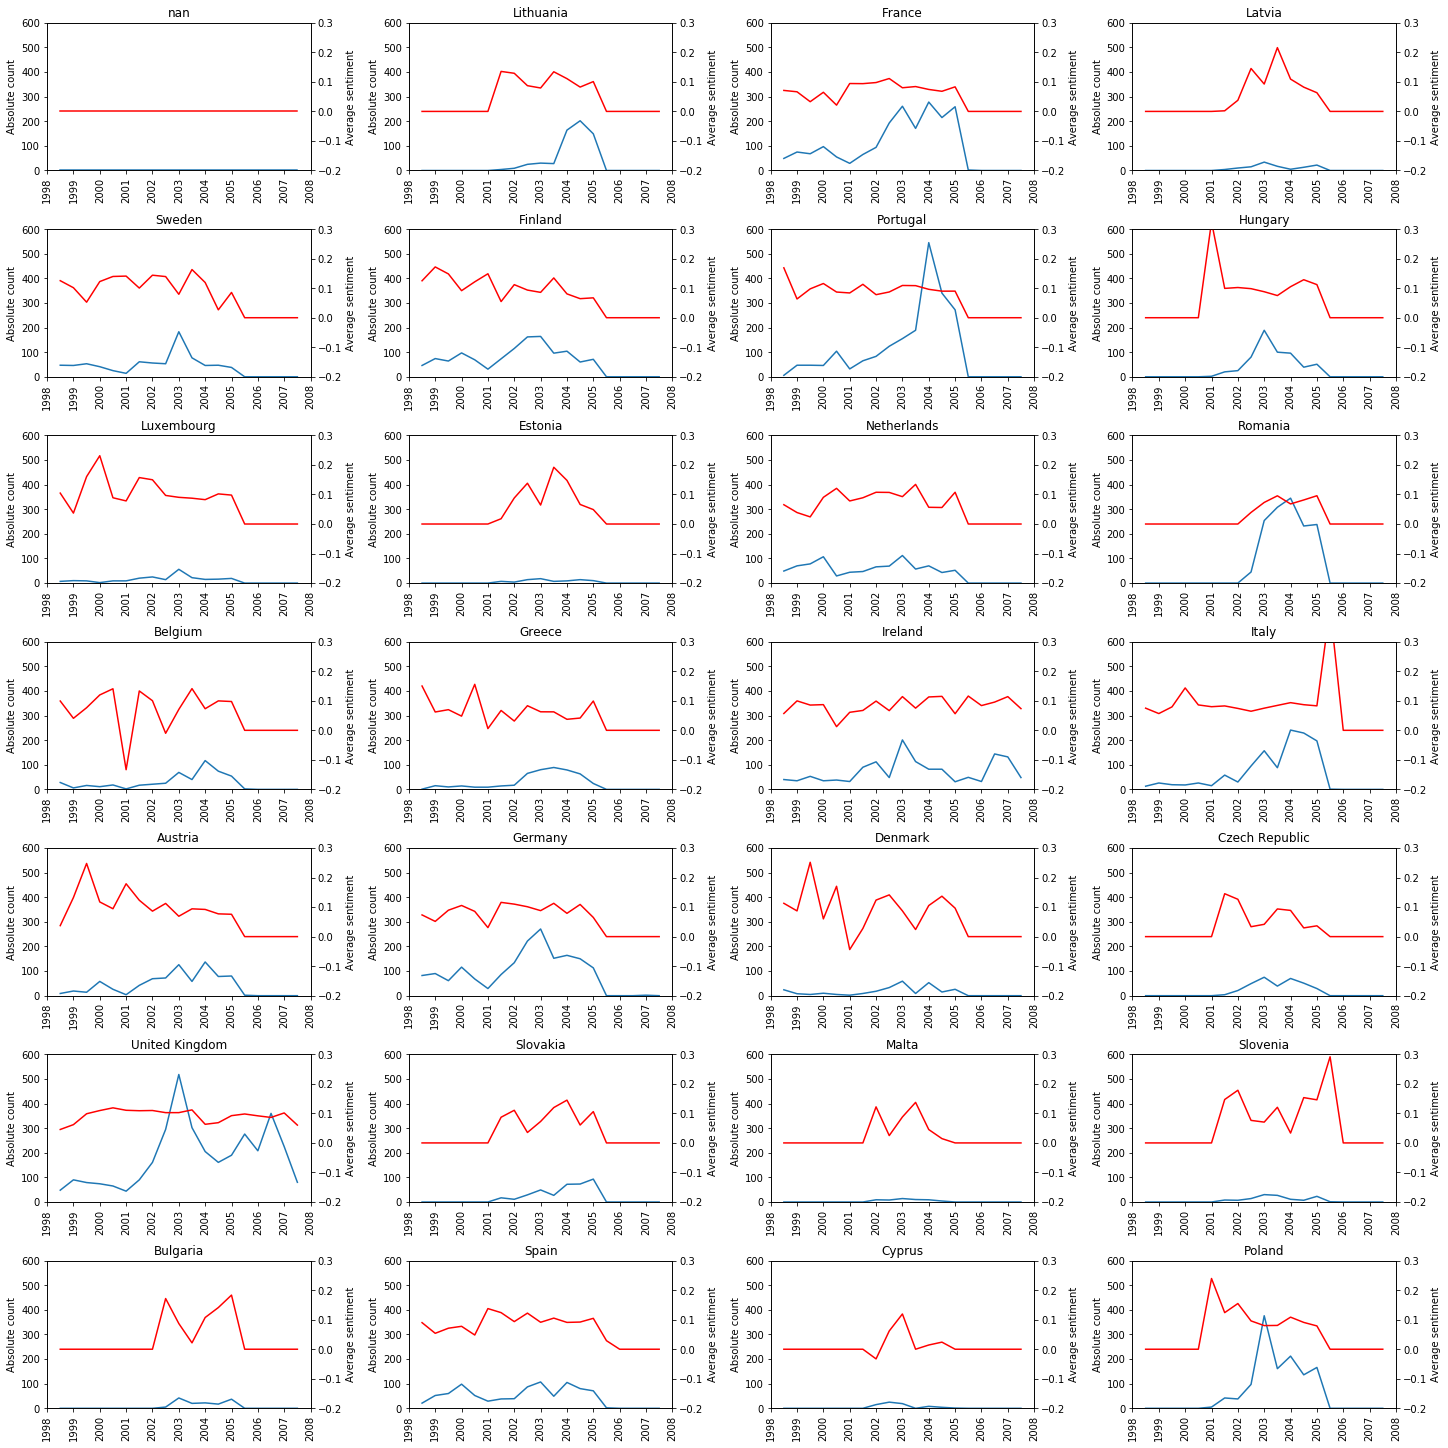

In [214]:
plot_sentiment_climatechange()

# Appendix

In [83]:
# import packages
import pandas as pd
import numpy as np
import re
import sys

import matplotlib.pyplot as plt

### Data directories

Note: please set the data-directory path and data-file path as appropriate in the target machine.

In [200]:
data_dir = "/Users/suhastheju/dhh19/data/processed/octavo/"
futureSentences_file = data_dir + "Future/Future-sentence-date-country-sentiment.csv"
futureSpeeches_file = data_dir + "Future/Future-speeches-date-keywords-country-sentiment.csv"

pastSentences_file = data_dir + "Past/Past-sentence-date-country-sentiment.csv"
PastSpeeches_file = data_dir + "Past/Past-speeches-date-keywords-country-sentiment.csv"

In [207]:
future_df = pd.read_csv(futureSentences_file, header=0, escapechar='\\', 
                    error_bad_lines=False, quotechar = '"')
past_df = pd.read_csv(pastSentences_file, header=0, escapechar='\\', 
                    error_bad_lines=False, quotechar = '"')

## Source code to obtain subcorpus with constraints

Note: The terminology used might not be appropriate for a typical linguist, please bear with it.

### get_subcorpora
This function outputs a sub-corpus of text from a more general corpus. Both the input and output files are of $\texttt{.csv}$ format. The function has two mandatory arguments $\texttt{input_csv}$ and $\texttt{output_csv}$ which are in the input and output files, respectively; and six optional arguments $\texttt{set_min:}$ minimum sentiment score, $\texttt{sent_max:}$ maximum sentiment score, $\texttt{subj_min:}$ minimum subjectivity score, $\texttt{subj_max:}$ maximum subjectivity score, $\texttt{date_min:}$ minimum date and $\texttt{date_max:}$ maximum date. The function writes the subcorpus satisfying all the constrainets specified in the arguments to a file specified using $\texttt{output_csv}$ argument.

In [62]:
def get_subcorpora(input_csv, output_csv, 
                   sent_min=-1.0, sent_max=+1.0, 
                   subj_min=0.0, subj_max=+1.0,
                   date_min="1999-01-01", date_max="2017-12-31",
                   gender="all", country="all"):
    # read csv input
    df = pd.read_csv(input_csv, header=0, escapechar='\\', 
                           error_bad_lines=False, quotechar = '"')
    
    #print(df.head())
    range_df = df[df['sentiment'].between(sent_min, sent_max, inclusive=True) & 
                  df['subjectivity'].between(subj_min, subj_max, inclusive=True) &
                  df['date'].between(date_min, date_max, inclusive=True)]
    
    if(gender == "male" or gender == "female"):
        range_df = range_df[range_df['gender']==gender]
    elif(gender == "NaN"):
        range_df = range_df[range_df['gender'].isnull()]
    #end if
    
    if(country != "all"):
        if(country == "NaN"):
            range_df = range_df[range_df['country'].isnull()]
        else:
            range_df = range_df[range_df['country']==country]
    #end if
        
    range_df.to_csv(output_csv,index=False)
    return range_df
#end get_subcorpora()

### An example
Below we show an example of using the $\texttt{get_subcorpora}$ function to get subcorpus of future sentences with sentiment score in range $<-1.0, 0>$, subjectivity score in range $<0, 0.5>$, in-between dates $2000-01-01$ to $2013-12-31$, with gender $\texttt{male}$ and $\texttt{all}$ countries.

In [91]:
input_file  = futureSentences_file # input file name
output_file = data_dir + "Future/output.csv" # output file name

# sentiment score range -1.0 to +1.0
sent_min = -1.0
sent_max = +1.0

# subjectivity score range 0.0 to 1.0
subj_min = 0
subj_max = 1.0 

# start and end date
start_date = "1999-01-01" # yyyy-mm-dd
end_date = "2018-12-31" #yyyy-mm-dd

# male/female/NaN/all
gender = "all"

# <country-name>/NaN/all
country = "all" 

subcorpora_df = get_subcorpora(input_file, output_file,
                               sent_min, sent_max,
                               subj_min, subj_max,
                               start_date, end_date, gender, country)
#subcorpora_df.head()

## Source code for plotting random samples of subcorpus

In [195]:
def plot_random_samples(future_df, past_df, rand_states, size):
    plt_count = 0
    plt.figure(figsize=(20,20))
    fig = plt.figure(constrained_layout=True, figsize=(20,20))
    spec = gridspec.GridSpec(ncols=3, nrows=5, figure=fig)
   
    for state in rand_states:
        future_random_df = future_df.sample(n=size, random_state=state)
        future_sent = future_random_df['sentiment']
        future_subj = future_random_df['subjectivity']
        
        past_random_df = past_df.sample(n=size, random_state=state)
        past_sent = past_random_df['sentiment']
        past_subj = past_random_df['subjectivity']
        
        ax = fig.add_subplot(spec[int(plt_count/3), int(plt_count%3)])
        ax.set_xlim(0,1.0)
        ax.set_ylim(-1.0,1.0)
        ax.scatter(future_subj, future_sent, color="red", facecolors="none", 
                   label="Future", alpha=0.75)
        ax.scatter(past_subj, past_sent, color="blue", facecolors="none", 
                   label="Past", alpha=0.75)
        
        ax.set_xlabel("Subjectivity", fontsize=18)
        ax.set_ylabel("Sentiment", fontsize=18)
        if plt_count == 2:
            legend_x = 1
            legend_y = 0.5
            ax.legend(["Future", "Past"], loc="center left", 
                      bbox_to_anchor=(legend_x, legend_y),
                      prop={'size': 15})
        #end if
        plt_count += 1
    #end for    
#end random_samples()

In [201]:
def plot_sentences():
    future_df = pd.read_csv(futureSentences_file, header=0, escapechar='\\', 
                        error_bad_lines=False, quotechar = '"')
    past_df = pd.read_csv(pastSentences_file, header=0, escapechar='\\', 
                        error_bad_lines=False, quotechar = '"')
    size = 500
    rand_states = random.sample(range(1,10000),15)
    plot_random_samples(future_df, past_df, rand_states, size)
#end plot_sentences()

In [203]:
def plot_speeches():
    future_df = pd.read_csv(futureSpeeches_file, header=0, escapechar='\\', 
                            error_bad_lines=False, quotechar = '"')
    past_df = pd.read_csv(PastSpeeches_file, header=0, escapechar='\\', 
                            error_bad_lines=False, quotechar = '"')
    size = 500
    rand_states = random.sample(range(1,10000),15)
    plot_random_samples(future_df, past_df, rand_states, size)
#end plot_speeches()

In [210]:
def plot_sentiment(data_df):
    # initialise
    start_year = 1999
    stop_year  = 2017
    count = {}
    sent  = {}
    subj  = {}
    for year in range(start_year, stop_year+1):
        count[year] = 0
        sent[year]  = []
        subj[year]  = []
    #end for
    
    data_nrows, data_ncols = data_df.shape
    for i in range(0, data_nrows):
        key = data_df['speech'][i]
        sent_score = data_df['sentiment'][i]
        subj_score = data_df['subjectivity'][i]
        year = pd.to_datetime(data_df['date'][i]).year
        #year = speech2year_map[key]
        count[year] += 1
        sent[year].append(sent_score)
        subj[year].append(subj_score)
    #end if
    
    x = list(count.keys())
    y = list(count.values())
    z = []
    for year in count.keys():
        #z.append(mean(sent[year]))
        z.append(sum(sent[year])/len(sent[year]))
    #end for
   

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x,y, '-', label = 'Absolute count')

    ax2 = ax.twinx()
    ax2.plot(x,z, '-r', label = 'Average sentiment')
    fig.legend(loc=1)

    plt.locator_params(axis='x', nbins=19)
    ax.set_xlabel("Timeline")
    ax.set_ylabel(r"Absolute count")
    ax2.set_ylabel(r"Average sentiment")
    plt.show()
    
    box_plot_data= [sent_list for sent_list in sent.values()]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot(box_plot_data, labels=range(start_year, stop_year+1))
    ax.set_xlabel("Timeline")
    ax.set_ylabel(r"Sentiment")
    ax.set_ylim([-1.0,+1.0])
    plt.xticks(rotation=90)
    #plt.savefig(plot_name+'.svg', format="svg")
    #plt.savefig(plot_name+'.png', format='png')
    plt.show()
#end plot_sentiment()

In [213]:
def plot_sentiment_bycountry(data_df):
    # initialise
    start_year = 1999
    stop_year  = 2017

    countries = list(set(data_df['country']))
    plt_count = 0
    plt.figure(figsize=(20,20))
    fig = plt.figure(constrained_layout=True, figsize=(20,20))
    spec = gridspec.GridSpec(ncols=4, nrows=7, figure=fig)
    for country in countries:
        count = {}
        sent  = {}
        subj  = {}
        for year in range(start_year, stop_year+1):
            count[year] = 0
            sent[year]  = []
            subj[year]  = []
        #end for
        
        data_nrows, data_ncols = data_df.shape
        for i in range(0, data_nrows):
            if country == data_df['country'][i]:
                key = data_df['speech'][i]
                sent_score = data_df['sentiment'][i]
                subj_score = data_df['subjectivity'][i]
                year = pd.to_datetime(data_df['date'][i]).year
                count[year] += 1
                sent[year].append(sent_score)
                subj[year].append(subj_score)
            #end if
        #end if

        x = list(count.keys())
        y = list(count.values())
        z = []
        for year in count.keys():
            #z.append(mean(sent[year]))
            if len(sent[year]) == 0:
                z.append(0)
            else:
                z.append(sum(sent[year])/len(sent[year]))
            #end if
        #end for

        ax = fig.add_subplot(spec[int(plt_count/4), int(plt_count%4)])
        ax.title.set_text(country)
        ax.set_xlim(1998, 2018)
        ax.set_xticklabels(list(range(1998, 2018)), rotation=90)
        ax.plot(x,y, '-', label = 'Absolute count')

        ax2 = ax.twinx()
        ax2.plot(x,z, '-r', label = 'Average sentiment')

        plt.locator_params(axis='x', nbins=19)
        ax.set_ylabel(r"Absolute count")
        ax2.set_ylabel(r"Average sentiment")
        ax.set_ylim([0,600])
        ax2.set_ylim([-0.2,0.3])

        plt_count += 1
    #end for
    #plt.tight_layout()
    plt.show()
#end plot_sentiment_bycountry()

In [215]:
def plot_sentiment_climatechange():
    sentiment_file = data_dir+"/Climate/Climate-sentence-date-country-sentiment.csv"
    sentiment_df = pd.read_csv(sentiment_file, header=0, escapechar='\\', 
                          error_bad_lines=False, quotechar = '"')
    plot_sentiment_bycountry(sentiment_df)
#end plot_sentiment_climatechange()